In [ ]:
#churn prediction using LogisticRegression

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#load and explore the data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#split the data
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#convert train data from categorical (object type) into numerical
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
x_train_encoded = encoder.fit_transform(x_train.select_dtypes(include=['object']))
x_train_numeric = x_train.drop(columns=x_train.select_dtypes(include=['object']).columns)
x_train_final = np.hstack((x_train_numeric, x_train_encoded))


In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_final = scaler.fit_transform(x_train_final)

In [ ]:
#fit the data
lr=LogisticRegression()
lr.fit(x_train_final,y_train)

LogisticRegression()

In [ ]:
#convert test data from categorical (object type) into numerical
x_test_encoded = encoder.transform(x_test.select_dtypes(include=['object']))
x_test_numeric = x_test.drop(columns=x_test.select_dtypes(include=['object']).columns)
x_test_final = np.hstack((x_test_numeric, x_test_encoded))


In [ ]:
x_test_scaled = scaler.transform(x_test_final)

In [ ]:
#predict
y_pred=lr.predict(x_test_final)
print(y_pred)

['Yes' 'No' 'No' ... 'No' 'No' 'Yes']


In [ ]:
#accuracy results and evulation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [ ]:
lr.score(x_train_final,y_train)

1.0

In [ ]:
lr.score(x_test_final,y_test)

0.7955997161107168

In [ ]:
confusion_matrix(y_test, y_pred)

array([[909, 127],
       [161, 212]])

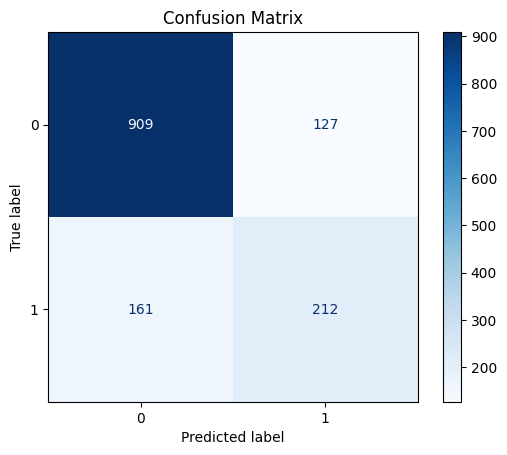

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

In [ ]:
pr=lr.predict_proba(x_test_final)
print(pr)

[[4.03986597e-01 5.96013403e-01]
 [9.99999999e-01 6.95839510e-10]
 [1.00000000e+00 3.50898183e-13]
 ...
 [9.99988190e-01 1.18100822e-05]
 [1.00000000e+00 4.67717032e-15]
 [4.13188400e-01 5.86811600e-01]]


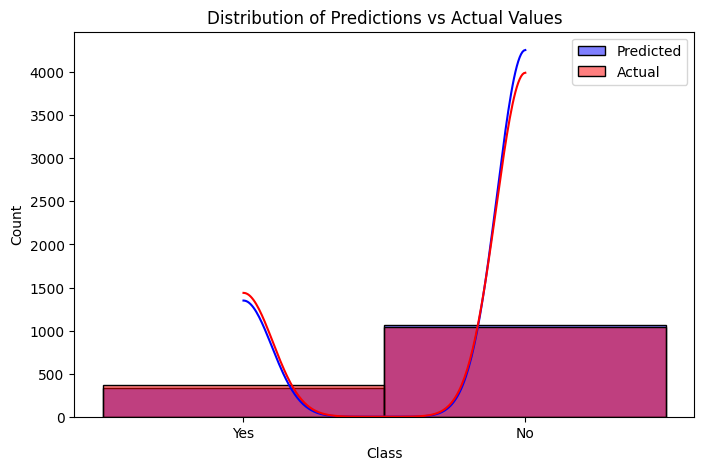

In [ ]:
#visualize the results
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()